<a href="https://colab.research.google.com/github/2xazo/classification/blob/main/Fashion_MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


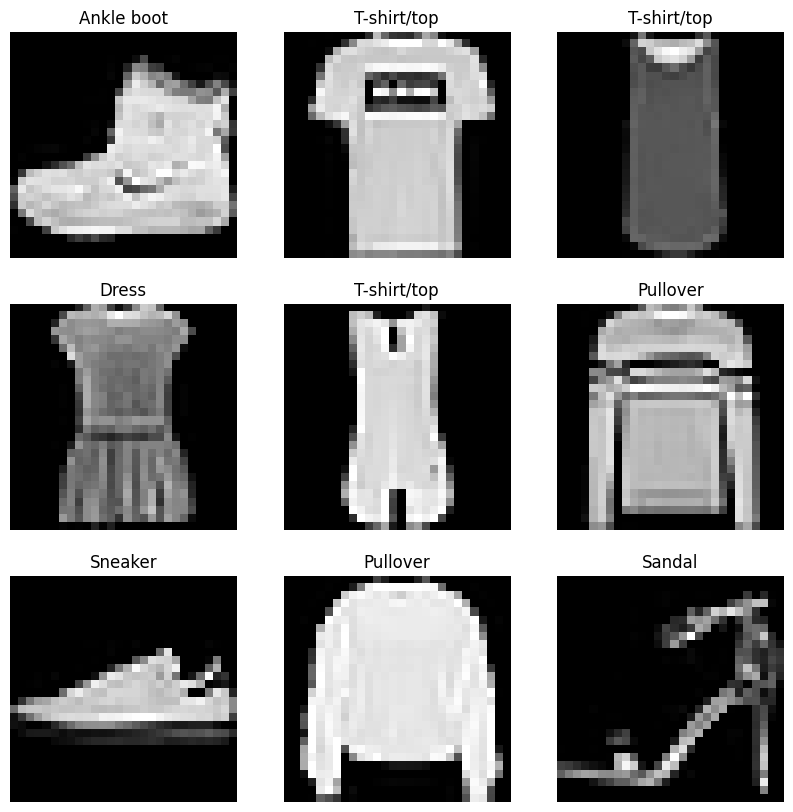

In [ ]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [ ]:
# Normalize the pixel's
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Split the training data for validation
X_train_flat, X_val_flat, y_train_flat, y_val_flat = train_test_split(X_train_flattened, y_train, test_size=0.2, random_state=42)

In [ ]:
x_small=X_train_flat[:2000]
y_small=y_train_flat[:2000]

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_small)
X_val_scaled = scaler.transform(X_val_flat)
X_test_scaled = scaler.transform(X_test_flattened)

# Implement Support Vector Machine classifier with different kernels
kernels = ['linear', 'poly', 'rbf']
models = {}
results = {}

for kernel in kernels:
    svm_classifier = SVC(kernel=kernel, random_state=42)
    svm_classifier.fit(X_train_scaled, y_small)

    # Evaluate the model
    y_pred = svm_classifier.predict(X_val_scaled)

    # Store the model and results
    models[kernel] = svm_classifier
    results[kernel] = classification_report(y_val_flat, y_pred, output_dict=True)

    print(f"Results for kernel: {kernel}")
    print(classification_report(y_val_flat, y_pred))

Results for kernel: linear
              precision    recall  f1-score   support

           0       0.74      0.79      0.77      1202
           1       0.93      0.97      0.95      1219
           2       0.65      0.70      0.67      1205
           3       0.81      0.84      0.82      1184
           4       0.69      0.66      0.68      1202
           5       0.90      0.87      0.88      1211
           6       0.58      0.50      0.54      1218
           7       0.87      0.86      0.87      1159
           8       0.95      0.91      0.93      1197
           9       0.90      0.93      0.91      1203

    accuracy                           0.80     12000
   macro avg       0.80      0.80      0.80     12000
weighted avg       0.80      0.80      0.80     12000

Results for kernel: poly
              precision    recall  f1-score   support

           0       0.83      0.58      0.68      1202
           1       0.99      0.93      0.96      1219
           2       0.81   